In [ ]:
# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
file_path = '/content/ToyotaCorolla - MLR.csv'
df = pd.read_csv(file_path)

In [ ]:
  #Step 1: Data Loading and EDA

In [4]:
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [6]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [8]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

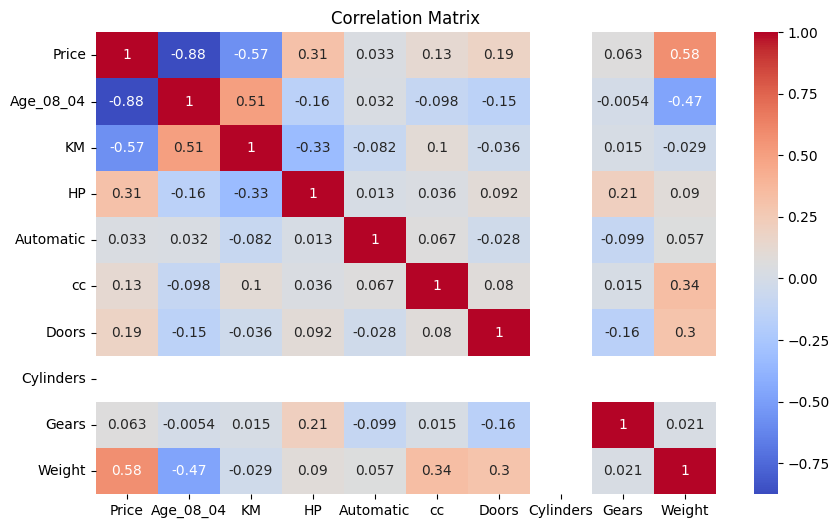

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Check the column names of the dataset
print(df.columns)


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


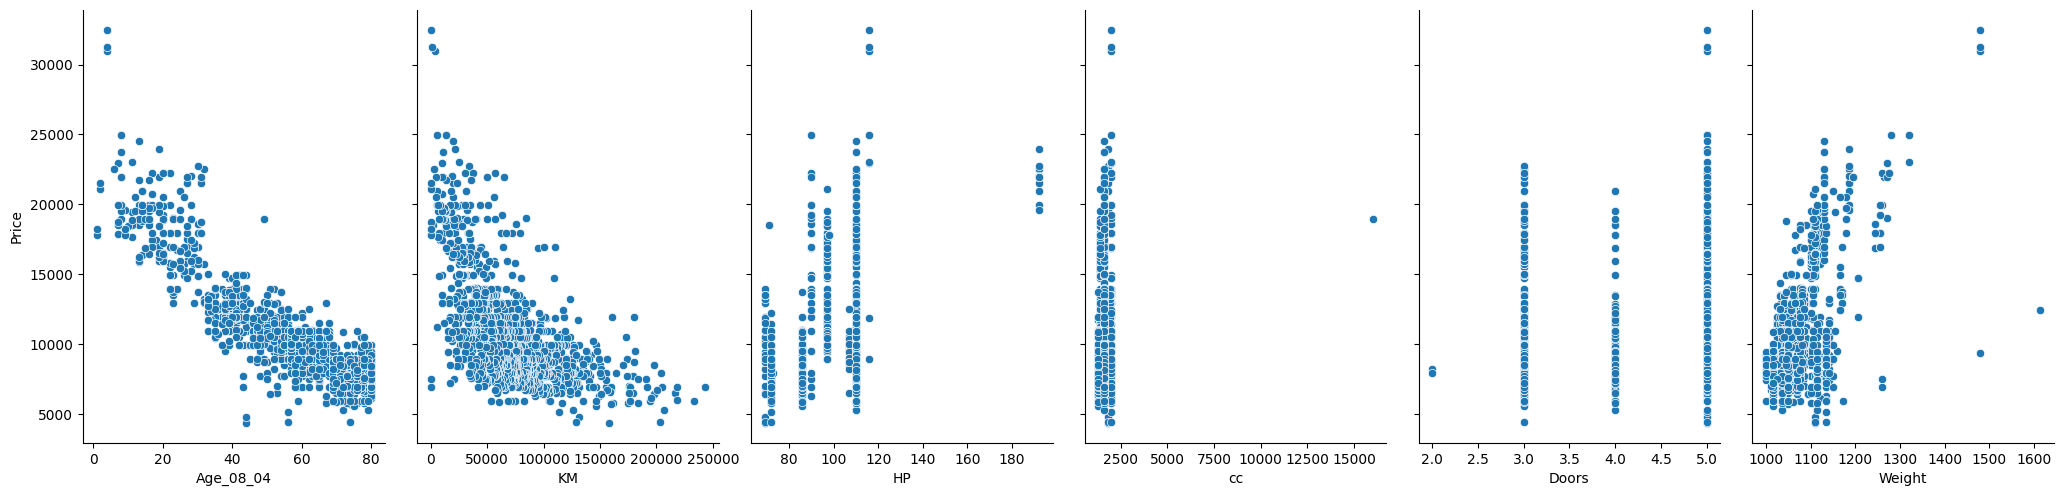

In [15]:
# Corrected column names based on your dataset
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight'], y_vars='Price', height=5, aspect=0.7)
plt.show()


In [ ]:
#Step 2: Data Preprocessing

In [18]:
# Convert categorical variables into dummy variables
# Check if the columns exist before applying pd.get_dummies
if 'FuelType' in df.columns and 'Automatic' in df.columns:
    df = pd.get_dummies(df, columns=['FuelType', 'Automatic'], drop_first=True)
else:
    # Print an informative message if the columns are not found
    print("Columns 'FuelType' or 'Automatic' not found in the DataFrame.")
    # You can also list available columns for debugging:
    print("Available columns:", df.columns)

Columns 'FuelType' or 'Automatic' not found in the DataFrame.
Available columns: Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [19]:
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [ ]:
# Drop any columns that are irrelevant to the analysis if present
# df = df.drop(columns=['...']) # If necessary, drop irrelevant columns

In [23]:
# Check if all columns are now numeric
print(df.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Create a LabelEncoder for categorical columns
categorical_cols = ['Fuel_Type']  # Replace with your actual categorical column names
for col in categorical_cols:
    # Create a LabelEncoder for the current column
    le = LabelEncoder()
    # Fit the encoder to the unique values in the column
    le.fit(df[col].unique())
    # Transform the column in the original DataFrame using the encoder
    df[col] = le.transform(df[col])

In [30]:
#  feature scaling
# 'Price' is the target, so we exclude it from the features
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

In [31]:
# Scale the features after ensuring all are numeric
scaler = StandardScaler()

In [32]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [33]:
# Check the scaled features (first 5 rows)
print(X_scaled[:5])

[[-1.77196633 -0.57469494 -2.33786794 -0.76804185 -0.24289308  0.99741932
  -1.08513865  0.         -0.14042519  1.75856113]
 [-1.77196633  0.11745379 -2.33786794 -0.76804185 -0.24289308  0.99741932
  -1.08513865  0.         -0.14042519  1.75856113]
 [-1.71818412 -0.71538641 -2.33786794 -0.76804185 -0.24289308  0.99741932
  -1.08513865  0.         -0.14042519  1.75856113]
 [-1.61061971 -0.54765017 -2.33786794 -0.76804185 -0.24289308  0.99741932
  -1.08513865  0.         -0.14042519  1.75856113]
 [-1.3954909  -0.80102818 -2.33786794 -0.76804185 -0.24289308  0.99741932
  -1.08513865  0.         -0.14042519  1.853577  ]]


In [ ]:
##Step 3: Split Data into Training and Testing Sets

In [34]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# Check the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1148, 10)
X_test shape: (288, 10)


In [ ]:
##Step 4: Build Multiple Linear Regression Models
## Model 1: Using all available features

In [36]:
# Initialize the Linear Regression model
model_1 = LinearRegression()

In [37]:
# Fit the model to the training data
model_1.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict on the test set
y_pred_1 = model_1.predict(X_test)

In [39]:
# Evaluate the model performance
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

In [40]:
print(f'Model 1 - MSE: {mse_1}, R²: {r2_1}')

Model 1 - MSE: 2096851.1400177027, R²: 0.8428476112018003


In [ ]:
##Model 2: Using a subset of features (Age, KM, HP, FuelType)

In [44]:
# Selecting a subset of features
# Use the actual column names from  DataFrame 'df'
# The error indicates 'Fuel_Type_Diesel' and 'Fuel_Type_CNG' are not found
# Check the actual column names in your DataFrame using df.columns
# If the column names are different, replace them here
# For example, if your fuel type column is a single column named 'FuelType',
# And it has values like 'Diesel', 'CNG', etc., you might need to use one-hot encoding
# using pd.get_dummies before selecting the subset.
# Example:
# df = pd.get_dummies(df, columns=['FuelType'], prefix=['FuelType'])
# X_subset = df[['Age_08_04', 'KM', 'HP', 'FuelType_Diesel', 'FuelType_CNG', 'Automatic']]
# Print df.columns to verify column names

# Assuming your columns are named 'Fuel_Type' and it has categorical values:
X_subset = df[['Age_08_04', 'KM', 'HP', 'Fuel_Type', 'Automatic']]

# Convert 'Fuel_Type' to dummy variables:
X_subset = pd.get_dummies(X_subset, columns=['Fuel_Type'], prefix=['Fuel_Type'], drop_first=False, dummy_na=False)

In [45]:
#Check the subset to ensure the columns are correctly selected
print(X_subset.head())

   Age_08_04     KM  HP  Automatic  Fuel_Type_0  Fuel_Type_1  Fuel_Type_2
0         23  46986  90          0        False         True        False
1         23  72937  90          0        False         True        False
2         24  41711  90          0        False         True        False
3         26  48000  90          0        False         True        False
4         30  38500  90          0        False         True        False


In [46]:
# Scale the subset
X_subset_scaled = scaler.fit_transform(X_subset)

In [47]:
# Split the subset into training and testing sets
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset_scaled, y, test_size=0.2, random_state=42)

In [48]:
# Initialize and train the model
model_2 = LinearRegression()
model_2.fit(X_train_sub, y_train_sub)

LinearRegression()

In [49]:
# Predict and evaluate
y_pred_2 = model_2.predict(X_test_sub)
mse_2 = mean_squared_error(y_test_sub, y_pred_2)
r2_2 = r2_score(y_test_sub, y_pred_2)

In [50]:
print(f'Model 2 - MSE: {mse_2}, R²: {r2_2}')

Model 2 - MSE: 2155261.9051164384, R²: 0.8384699083255154


In [ ]:
### Model 3: Excluding 'Doors' and 'Weight'

In [51]:
# Exclude 'Doors' and 'Weight' from the dataset
X_exclude = df.drop(columns=['Price', 'Doors', 'Weight'])

In [52]:
# Scale the data
X_exclude_scaled = scaler.fit_transform(X_exclude)

In [53]:
# Split the data
X_train_exc, X_test_exc, y_train_exc, y_test_exc = train_test_split(X_exclude_scaled, y, test_size=0.2, random_state=42)


In [54]:
# Train the model
model_3 = LinearRegression()
model_3.fit(X_train_exc, y_train_exc)

LinearRegression()

In [55]:
# Predict and evaluate
y_pred_3 = model_3.predict(X_test_exc)
mse_3 = mean_squared_error(y_test_exc, y_pred_3)
r2_3 = r2_score(y_test_exc, y_pred_3)


In [56]:
print(f'Model 3 - MSE: {mse_3}, R²: {r2_3}')

Model 3 - MSE: 2300094.5473057055, R²: 0.8276151579516733


In [ ]:
#Step 5: Lasso and Ridge Regression

In [57]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [58]:
print(f'Lasso - MSE: {mse_lasso}, R²: {r2_lasso}')

Lasso - MSE: 2096720.6573912082, R²: 0.842857390463694


In [59]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge - MSE: {mse_ridge}, R²: {r2_ridge}')

Ridge - MSE: 2096772.7140387727, R²: 0.8428534889819143


Explanation:

1.EDA helps in understanding the relationships and distributions of the data.

2.Preprocessing is crucial to prepare the data for modeling by handling categorical variables and scaling.

3.Modeling involves creating different linear regression models and interpreting their performance.

4.Evaluation is done using metrics like MSE and R².

5.Lasso and Ridge add regularization to the regression model to prevent overfitting.

**Interview Questions:**

# 1.What is Normalization & Standardization and how is it helpful?

Normalization: This technique rescales data to a range, typically between 0 and 1. It's helpful when your model (like K-Nearest Neighbors or Neural Networks) relies on distances or is sensitive to the scale of the features.

X
normalized
​
 =
 ___
max(X)−min(x)
X−min(X)
​


Standardization: This rescales data to have a mean of 0 and a standard deviation of 1 (z-scores). It is useful when features have different units or when algorithms assume normally distributed data (e.g., Linear Regression, SVM).


X
standardized
​
 =
σ
X−μ
​

Both techniques ensure that features are on a similar scale, improving model performance and convergence speed.

# 2. What techniques can be used to address multicollinearity in multiple linear regression?

1.Remove one of the correlated features: If two or more features are highly correlated, you can drop one of them.

2.Use Principal Component Analysis (PCA): PCA reduces the dimensionality of the data by transforming correlated features into a smaller set of uncorrelated variables (principal components).

3.Apply Ridge or Lasso regression: Ridge (L2) and Lasso (L1) are regularization techniques that add penalties to the regression model, reducing the impact of multicollinearity.
